In [1]:
import  numpy as np
import  matplotlib
from    matplotlib import pyplot as plt
# Default parameters for plots
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['figure.titlesize'] = 20
matplotlib.rcParams['figure.figsize'] = [9, 7]
matplotlib.rcParams['font.family'] = ['STKaiti']
matplotlib.rcParams['axes.unicode_minus']=False 



import tensorflow as tf
import timeit

In [2]:
cpu_data = []
gpu_data = []

In [3]:
for n in range(9):
    n = 10**n
    # 创建在CPU上运算的2个矩阵
    with tf.device('/cpu:0'):
        cpu_a = tf.random.normal([1, n])
        cpu_b = tf.random.normal([n, 1])
        print(cpu_a.device, cpu_b.device)
    # 创建使用GPU运算的2个矩阵
    with tf.device('/gpu:0'):
        gpu_a = tf.random.normal([1, n])
        gpu_b = tf.random.normal([n, 1])
        print(gpu_a.device, gpu_b.device)

    def cpu_run():
        with tf.device('/cpu:0'):
            c = tf.matmul(cpu_a, cpu_b)
        return c 

    def gpu_run():
        with tf.device('/gpu:0'):
            c = tf.matmul(gpu_a, gpu_b)
        return c 

    # 第一次计算需要热身，避免将初始化阶段时间结算在内
    cpu_time = timeit.timeit(cpu_run, number=10)
    gpu_time = timeit.timeit(gpu_run, number=10)
    print('warmup:', cpu_time, gpu_time)
    # 正式计算10次，取平均时间
    cpu_time = timeit.timeit(cpu_run, number=10)
    gpu_time = timeit.timeit(gpu_run, number=10)
    print('run time:', cpu_time, gpu_time)
    cpu_data.append(cpu_time/10)
    gpu_data.append(gpu_time/10)

    del cpu_a,cpu_b,gpu_a,gpu_b

/job:localhost/replica:0/task:0/device:CPU:0 /job:localhost/replica:0/task:0/device:CPU:0
/job:localhost/replica:0/task:0/device:GPU:0 /job:localhost/replica:0/task:0/device:GPU:0
warmup: 0.0007815000000000001 0.2249285
run time: 0.0008859999999999979 0.0005977000000000066
/job:localhost/replica:0/task:0/device:CPU:0 /job:localhost/replica:0/task:0/device:CPU:0
/job:localhost/replica:0/task:0/device:GPU:0 /job:localhost/replica:0/task:0/device:GPU:0
warmup: 0.0007121999999999962 0.0005669000000000091
run time: 0.0007569000000000048 0.0005485000000000073
/job:localhost/replica:0/task:0/device:CPU:0 /job:localhost/replica:0/task:0/device:CPU:0
/job:localhost/replica:0/task:0/device:GPU:0 /job:localhost/replica:0/task:0/device:GPU:0
warmup: 0.0006473000000000173 0.0005422999999999956
run time: 0.0007560000000000067 0.0005645000000000233
/job:localhost/replica:0/task:0/device:CPU:0 /job:localhost/replica:0/task:0/device:CPU:0
/job:localhost/replica:0/task:0/device:GPU:0 /job:localhost/repl

c:\users\sha\anaconda3\envs\tensorflow2\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  if sys.path[0] == '':


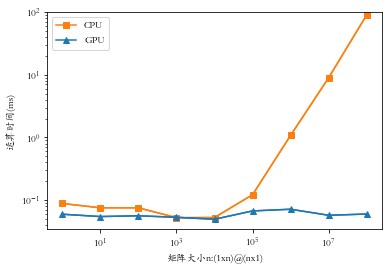

In [4]:
x = [10**i for i in range(9)]
cpu_data = [1000*i for i in cpu_data]
gpu_data = [1000*i for i in gpu_data]
plt.plot(x, cpu_data, 'C1')
plt.plot(x, cpu_data, color='C1', marker='s', label='CPU')
plt.plot(x, gpu_data,'C0')
plt.plot(x, gpu_data, color='C0', marker='^', label='GPU')


plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
plt.ylim([0,100])
plt.xlabel('矩阵大小n:(1xn)@(nx1)')
plt.ylabel('运算时间(ms)')
plt.legend()
plt.show()